## Database Overview

The database used in this analysis contains official statistics from the popular video game Pokémon. The information is updated up to the sixth generation of Pokémon, reflecting accurate data from the Pokémon series as of 2014. This update coincides with the release of the games Pokémon Omega Ruby and Pokémon Alpha Sapphire for the Nintendo 3DS console, developed by Nintendo.

Pokémon are fictional creatures, often inspired by real-life animals, objects, plants, myths, etc. Known for their fighting capabilities, each Pokémon is unique, possessing distinct powers and characteristics. Notably, some Pokémon can undergo evolution, transforming into stronger creatures. These creatures exist within the Pokémon universe ecosystem, mirroring the diversity of living beings in the real world.

The database encompasses information about 721 Pokémon introduced during this period. It's worth noting that certain Pokémon in the database have different forms. However, these alternative forms are treated as if they were the same Pokémon, sharing the same Pokédex index number. An example of this can be observed in the database, where a Pokémon is mentioned, followed by another row with the same Pokédex index number and name but featuring a Mega-Evolution prefix and different statistics.


# Pokémon Attributes

Each Pokémon possesses various attributes that define their characteristics. The following are key attributes:

## PokeDex Index Number
- A unique identification number assigned to each Pokémon.
- Exceptions exist for alternative forms of Pokémon.

## Pokémon Name
- Unique strings identifying each Pokémon.
- Names may include numbers and non-alphanumeric characters.
- Remains unique even for alternative forms.

## Primary Type
- The primary classification of a Pokémon based on its nature.
- All Pokémon are required to have a primary type.

## Secondary Type
- Also known as the "Other type" or "Secondary type."
- Optional attribute; Pokémon may or may not have a secondary type.
- Pokémon with a secondary type are referred to as "Dual type."

## Types
- Qualitative strings representing Pokémon's nature and powers.
- Pokémon can have a maximum of two types.
- A minimum of one type is required.
- 18 types in total, including Normal, Rock, Grass, Water, Fire, Bug, Poison, Ground, Flying, Electric, Ice, Psychic, Fighting, Ghost, Dragon, Dark, Steel, and Fairy.

## BST (Base Stat Total)
- The sum of Attack, Special Attack, Defense, Special Defense, Speed, and Hit Points.
- A measurement indicating the overall strength of a Pokémon.

## Hit Points (HP)
- Represents the amount of health a Pokémon has.
- If HP reaches zero, the Pokémon faints and cannot be used in combat.
- Higher HP values indicate greater durability.
- Qualifies as a defensive stat.

## Attack
- Represents the physical strength of a Pokémon.
- Higher Attack values indicate stronger physical moves.
- Qualifies as an offensive stat.

## Defense
- Represents the physical defense of a Pokémon.
- Higher Defense values provide greater mitigation against physical attacks.
- Qualifies as a defensive stat.

## Special Attack
- Represents the special strength (e.g., magic, spells) of a Pokémon.
- Higher Special Attack values indicate stronger special attack moves.
- Qualifies as an offensive stat.

## Special Defense
- Represents the special defense of a Pokémon.
- Higher Special Defense values provide greater mitigation against special attack moves.
- Qualifies as a defensive stat.

## Speed
- Determines which Pokémon moves first in a battle.
- Pokémon with higher Speed values move first.

## Generation Number
- Indicates the generation in which the Pokémon was first introduced.
- The database includes information from six different generations.
- Some generations introduced more Pokémon than others.

## Legendary Denominator
- Qualitative attribute indicating whether a Pokémon is legendary.
- Values: True or False.
- The criteria for legendary status are not explicitly defined.
- Only a small number of Pokémon are considered legendary.


## Importing Data from CSV Files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_pokeStat = pd.read_csv('Pokemon.csv')

Importing additional Libraries

## Display Pokémon File Data

To view the data in the Pokémon file, use the following command:

```python
    display(df_pokeStat)

In [2]:
display(df_pokeStat)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


## Question 1:

What does the distribution of Pokémon stats look like, and how are the key statistics (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) spread across different values? Explore the kernel density estimates for each statistic, visualized in a single plot with distinctive colors. How might the distribution patterns vary, and what insights can be gained about the overall stat distribution for these Pokémon?


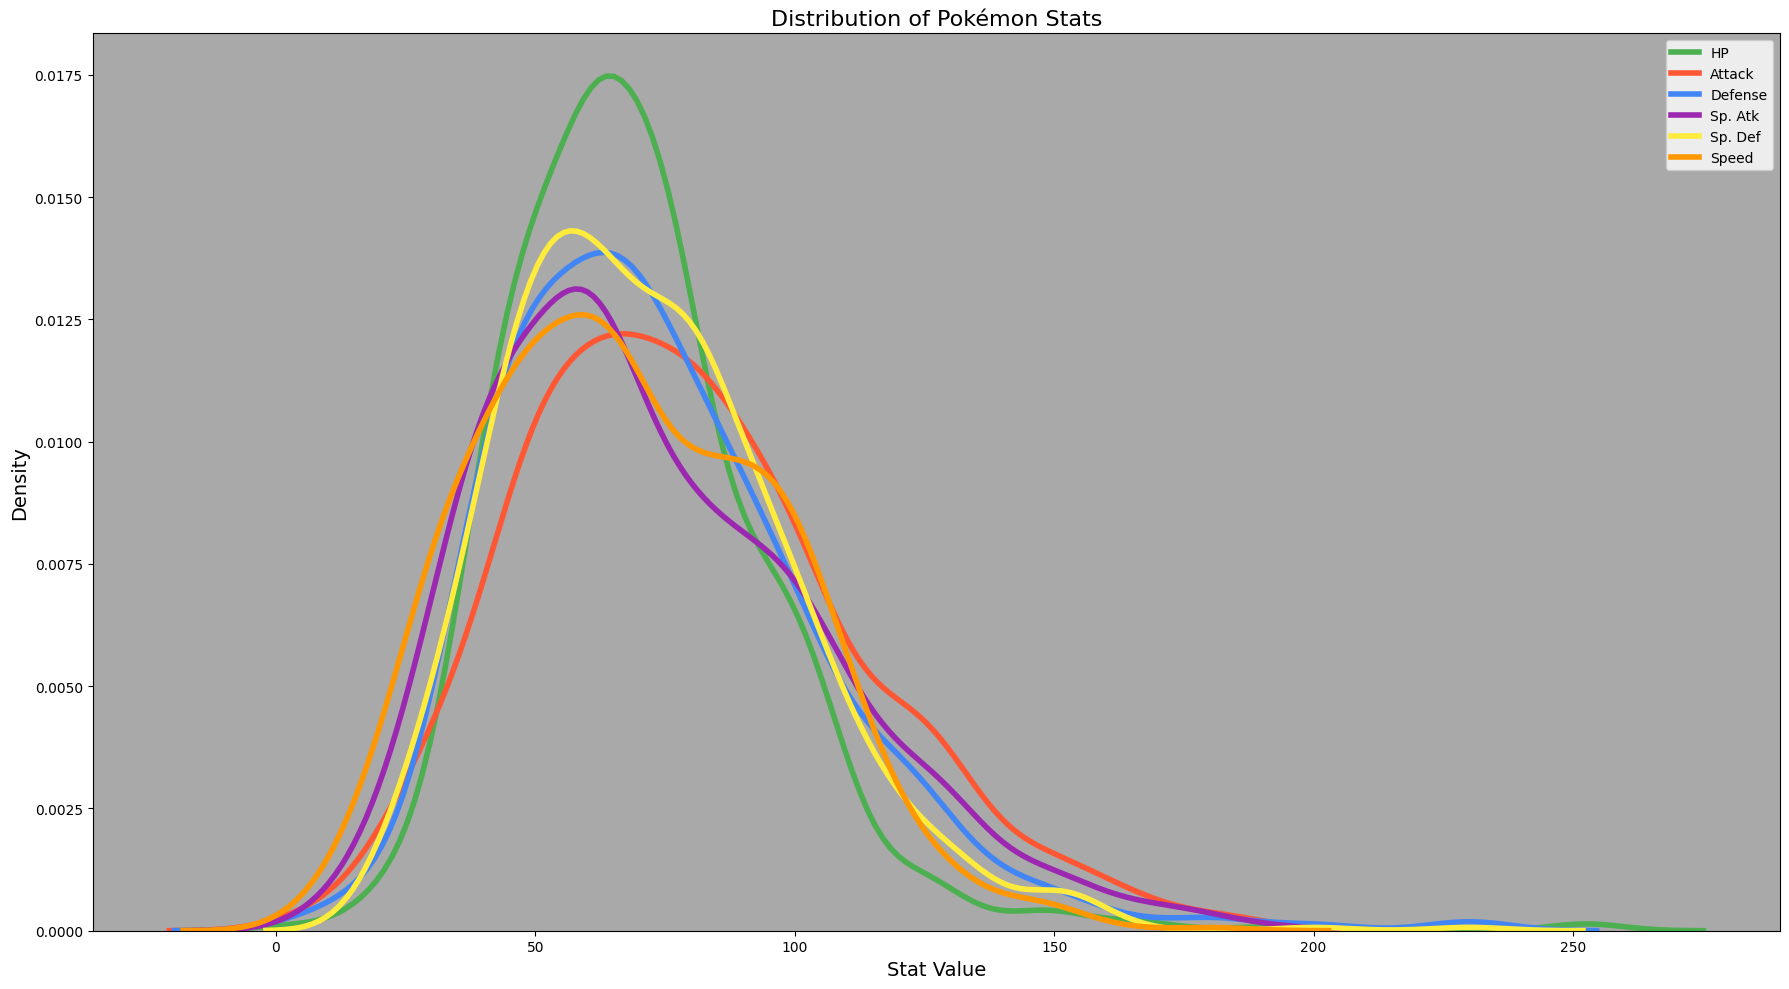

In [3]:
# Define colors for each statistic
colors = {
    'HP': '#4CAF50',         # Green
    'Attack': '#FF5733',     # Red
    'Defense': '#4285F4',    # Blue
    'Sp. Atk': '#9C27B0',    # Purple
    'Sp. Def': '#FFEB3B',    # Yellow
    'Speed': '#FF9800'       # Orange
}

# Set background color
background_color = '#A9A9A9'

# Set the size of the figure
plt.figure(figsize=(18, 10))

# Plot kernel density estimates for each statistic
for stat, color in colors.items():
    sns.kdeplot(df_pokeStat[stat], color=color, label=stat, linewidth=4)

# Get the current axis
ax = plt.gca()

# Set the face color of the plot area
ax.set_facecolor(background_color)

# Set plot title and axis labels
plt.title('Distribution of Pokémon Stats', fontsize=16)
plt.xlabel('Stat Value', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show legend
plt.legend()

# Adjust layout for better appearance
plt.tight_layout()

# Display the plot
plt.show()


## Question 2: Pokémon with Highest Statistic Values

Identify the Pokémon with the highest values for each statistic (Hit Points, Attack, Defense, Special Attack, Special Defense, Speed). Additionally, provide their Pokédex index number and the generation they belong to.

**Insights:** This analysis allows us to discover the top Pokémon in various roles and understand the trade-offs among their stats. It provides insights into how Pokémon need to balance other stats when excelling in a single area.



In [4]:
# List of statistics to analyze
statList = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# List to store data about Pokémon with the highest stats
max_stats_data = []

# Iterate through each statistic
for stat in statList:
    # Find the index of the Pokémon with the highest value for the current stat
    max_index = df_pokeStat[stat].idxmax()
    
    # Extract relevant information for the Pokémon with the highest stat
    pokemon_name = df_pokeStat.loc[max_index, 'Name']
    index_number = df_pokeStat.loc[max_index, '#']
    generation = df_pokeStat.loc[max_index, 'Generation']
    
    # Append the data to the list
    max_stats_data.append({
        'Stat': stat,
        'Pokémon': pokemon_name,
        'Index Number': index_number,
        'Generation': generation
    })

# Create a DataFrame from the collected data
max_stats_df = pd.DataFrame(max_stats_data)

# Display the DataFrame containing Pokémon with the highest stats for each category
print("Pokémon with the Highest Stats for Each Category:")
display(max_stats_df)

# Provide insights or analysis
print("\nInsights:")
print("Identifying Pokémon with the highest stats for each category allows trainers to understand the top performers in specific attributes.")
print("These Pokémon can serve as benchmarks for comparison and strategic team building.")
print("Understanding which Pokémon excel in particular stats is crucial for optimizing team composition in battles.")

Pokémon with the Highest Stats for Each Category:


,Stat,Pokémon,Index Number,Generation
0,HP,Blissey,242,2
1,Attack,MewtwoMega Mewtwo X,150,1
2,Defense,SteelixMega Steelix,208,2
3,Sp. Atk,MewtwoMega Mewtwo Y,150,1
4,Sp. Def,Shuckle,213,2
5,Speed,DeoxysSpeed Forme,386,3



Insights:
Identifying Pokémon with the highest stats for each category allows trainers to understand the top performers in specific attributes.
These Pokémon can serve as benchmarks for comparison and strategic team building.
Understanding which Pokémon excel in particular stats is crucial for optimizing team composition in battles.


## Question 3: Comparing Strength Across Pokémon Generations

Compare Pokémon from all generations based on their strength. Determine the top 6 generations when referring to the average of statistics, utilizing the Base Stat Total (BST) statistic for all Pokémon in each generation and computing the average for each generation.

**Insights:** This analysis explores the average strength of Pokémon introduced in each generation. Notably, Generation 4 emerges as the strongest on average, while Generation 2 appears to be the weakest. This observation aligns with the fact that Generation 4 introduced final forms of previously introduced Pokémon, typically stronger stat-wise. In contrast, Generation 2 introduced a significant number of baby Pokémon, which are the first forms of pre-existing Pokémon and tend to be weaker stat-wise.

In [5]:
# Selected statistics for analysis
selected_stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Calculate average stats by generation
average_stats_by_generation = df_pokeStat.groupby('Generation')[selected_stats].mean()

# Calculate the Base Stat Total (BST) for each generation
average_stats_by_generation['BST'] = average_stats_by_generation.sum(axis=1)

# Rank generations based on BST values in descending order
generation_ranking = average_stats_by_generation.sort_values(by='BST', ascending=False)

# Display the ranking of generations based on average BST values
print("Average Stats and BST Ranking by Generation:")
display(generation_ranking)

# Provide insights or analysis
print("\nInsights:")
print("Analyzing the average stats and BST values by generation provides valuable insights into the overall strength of Pokémon introduced in each generation.")
print("Generation ranking is determined based on the total Base Stat Total (BST), showcasing the collective strength of Pokémon.")
print("Understanding these trends can offer strategic insights for Pokémon trainers.")

Average Stats and BST Ranking by Generation:


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,BST
Generation,,,,,,,
4,73.082645,82.867769,78.132231,76.404959,77.190083,71.338843,459.016529
6,68.268293,75.804878,76.682927,74.292683,74.890244,66.439024,436.378049
3,66.543750,81.625000,74.100000,75.806250,71.225000,66.925000,436.225000
5,71.787879,82.066667,72.327273,71.987879,68.739394,68.078788,434.987879
1,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337,426.813253
2,71.207547,72.028302,73.386792,65.943396,73.905660,61.811321,418.283019



Insights:
Analyzing the average stats and BST values by generation provides valuable insights into the overall strength of Pokémon introduced in each generation.
Generation ranking is determined based on the total Base Stat Total (BST), showcasing the collective strength of Pokémon.
Understanding these trends can offer strategic insights for Pokémon trainers.


## Question 4: Top 5 Pokémon Types with the Most Pokémon

Explore the distribution of Pokémon types and identify the top 5 types with the highest number of Pokémon. For each type, specify the generation that contributed the most Pokémon.

**Insights:** Curiosity about the distribution of Pokémon types led us to name the top 5 most common types. Additionally, we highlight the generation that contributed the most for each typing. It's notable that Water types dominate, reflecting the abundance of water areas in the games. The emphasis on specific typings in each generation indicates the intentional focus during game creation.

Interestingly, Flying and Normal types closely compete for the 2nd place. The prevalence of the Normal + Flying typing combination contributes to their near tie. This observation sheds light on the significance of certain typing combinations in Pokémon distribution.


In [6]:
# List to store data about top Pokémon types
top_types_data = []

# Count occurrences of each Pokémon type
type_counts = pd.concat([df_pokeStat['Type 1'], df_pokeStat['Type 2']], axis=0).value_counts()

# Display the counts for each Pokémon type
print("Counts for Each Pokémon Type:")
display(type_counts.head())

# Iterate through each Pokémon type
for type_name in type_counts.index:
    # Filter Pokémon data for the current type
    type_filter = (df_pokeStat['Type 1'] == type_name) | (df_pokeStat['Type 2'] == type_name)
    
    # Find the generation that contributes the most for the current type
    top_generation = df_pokeStat.loc[type_filter, 'Generation'].value_counts().idxmax()
    
    # Count the number of Pokémon for the current type
    pokemon_count = type_counts[type_name]
    
    # Append the results to the list
    top_types_data.append({
        'Type': type_name,
        'Most Contributing Generation': top_generation,
        'Pokemon Count': pokemon_count
    })

# Create a DataFrame from the collected data
top_types_data_df = pd.DataFrame(top_types_data)

# Display the top 5 Pokémon types based on contribution and count
print("\nTop 5 Pokémon Types Based on Contribution and Count:")
display(top_types_data_df.head(5))


Counts for Each Pokémon Type:


Water      126
Normal     102
Flying     101
Grass       95
Psychic     90
Name: count, dtype: int64


Top 5 Pokémon Types Based on Contribution and Count:


,Type,Most Contributing Generation,Pokemon Count
0,Water,1,126
1,Normal,1,102
2,Flying,1,101
3,Grass,5,95
4,Psychic,3,90


## Question 5: Pokémon Type with the Most Offensive Pokémon on Average

Determine which Pokémon typing appears to have the most offensive Pokémon on average, considering the sum of Attack, Special Attack, and Speed.

**Insights:** Answering questions about offensive and defensive characteristics of Pokémon types adds an intriguing layer to the analysis. Certain types are known for their offensive, defensive, or balanced attributes. The result reveals which Pokémon typing, on average, excels in offensive capabilities based on the sum of Attack, Special Attack, and Speed. This information can provide valuable insights for those interested in optimizing their Pokémon teams.


In [7]:
# Create a new column in the DataFrame for the sum of Attack, Special Attack, and Speed
df_pokeStat['Offensive_Sum'] = df_pokeStat['Attack'] + df_pokeStat['Sp. Atk'] + df_pokeStat['Speed']

# Display the updated DataFrame with the new Offensive_Sum column
print("DataFrame with Offensive_Sum column:")
display(df_pokeStat.head())

# Separate Type 1 and Type 2 columns for clarity
type_1 = df_pokeStat['Type 1']
type_2 = df_pokeStat['Type 2']

# Combine Type 1 and Type 2 into a single column
types_combined = pd.concat([type_1, type_2])

# Display the types_combined Series for review
print("\nCombined Types:")
display(types_combined)

# Calculate the average offensive sum for each Pokémon type
average_offensive_by_type = types_combined.groupby(types_combined).apply(lambda x: df_pokeStat.loc[x.index, 'Offensive_Sum'].mean())

# Display the average offensive sum for each Pokémon type
print("\nAverage Offensive Sum by Type:")
display(average_offensive_by_type)

# Find the Pokémon type with the highest average offensive sum
most_offensive_type = average_offensive_by_type.idxmax()

# Print the result
print(f"\nThe Pokémon typing with the most offensive Pokémon on average is: {most_offensive_type}")

DataFrame with Offensive_Sum column:


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Offensive_Sum
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,159
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,202
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,262
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,302
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,177



Combined Types:


0      Grass
1      Grass
2      Grass
3      Grass
4       Fire
       ...  
795    Fairy
796    Fairy
797    Ghost
798     Dark
799    Water
Length: 1600, dtype: object


Average Offensive Sum by Type:


Bug         187.013889
Dark        250.078431
Dragon      285.340000
Electric    241.420000
Fairy       193.925000
Fighting    248.113208
Fire        252.531250
Flying      242.980198
Ghost       215.565217
Grass       207.115789
Ground      212.955224
Ice         232.736842
Normal      201.980392
Poison      203.935484
Psychic     244.333333
Rock        202.224138
Steel       221.857143
Water       213.468254
dtype: float64


The Pokémon typing with the most offensive Pokémon on average is: Dragon


## Question 6: Pokémon Type with the Most Defensive Pokémon on Average

Explore which Pokémon type seems to have the most defensive Pokémon on average. Defensive Pokémon are determined based on the sum of Hit Points, Defense, and Special Defense.

**Insights:** Answering these questions can be challenging, but it adds an interesting perspective to understand the defensive and offensive characteristics of Pokémon types. Certain types are known for their offensive, defensive, or neutral attributes. The analysis reveals that Rock-type Pokémon have the best defensive statistics, while Dark-type Pokémon excel in offensive capabilities. It's worth noting that Rock types may not perform well offensively due to below-average speed and a lack of special attack, emphasizing their focus on physical attacks. Similarly, Dark types exhibit below-average defense and special defense.


In [8]:
# Create a new column in the DataFrame for the sum of Hit points, Defense, and Special Defense
df_pokeStat['Defensive_Sum'] = df_pokeStat['Defense'] + df_pokeStat['Sp. Def'] + df_pokeStat['HP']

# Display the updated DataFrame with the new Defensive_Sum column
print("DataFrame with Defensive_Sum column:")
display(df_pokeStat.head())

# Separate Type 1 and Type 2 columns for clarity
type_1 = df_pokeStat['Type 1']
type_2 = df_pokeStat['Type 2']

# Combine Type 1 and Type 2 into a single column
types_combined = pd.concat([type_1, type_2])

# Display the types_combined Series for review
print("\nCombined Types:")
display(types_combined)

# Calculate the average offensive sum for each Pokémon type
average_defensive_by_type = types_combined.groupby(types_combined).apply(lambda x: df_pokeStat.loc[x.index, 'Defensive_Sum'].mean())

# Display the average defensive sum for each Pokémon type
print("\nAverage Defensive Sum by Type:")
display(average_defensive_by_type)

# Find the Pokémon type with the highest average defensive sum
most_defensive_type = average_defensive_by_type.idxmax()

# Print the result
print(f"\nThe Pokémon typing with the most defensive Pokémon on average is: {most_defensive_type}")


DataFrame with Defensive_Sum column:


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Offensive_Sum,Defensive_Sum
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,159,159
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,202,203
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,262,263
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,302,323
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,177,132



Combined Types:


0      Grass
1      Grass
2      Grass
3      Grass
4       Fire
       ...  
795    Fairy
796    Fairy
797    Ghost
798     Dark
799    Water
Length: 1600, dtype: object


Average Defensive Sum by Type:


Bug         192.513889
Dark        210.823529
Dragon      256.420000
Electric    203.420000
Fairy       222.000000
Fighting    222.000000
Fire        214.578125
Flying      210.851485
Ghost       221.304348
Grass       210.810526
Ground      228.119403
Ice         234.710526
Normal      200.088235
Poison      193.758065
Psychic     232.755556
Rock        246.913793
Steel       264.734694
Water       215.626984
dtype: float64


The Pokémon typing with the most defensive Pokémon on average is: Steel


## Question 7:

What are the criteria for determining the strongest and weakest Pokémon? Explore the dataset to identify the Pokémon with the highest and lowest Base Stat Total (BST), which is the sum of all statistics (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed). Consider providing insights into the significance of the BST metric and how it correlates with the overall strength of Pokémon in battles.


In [9]:
# Calculate BST (Base Stat Total) as the sum of all individual stats
df_pokeStat['BST'] = df_pokeStat[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

# Find the Pokémon with the highest BST (sum of all stats)
strongest_pokemon = df_pokeStat.loc[df_pokeStat['BST'].idxmax()]

# Find the Pokémon with the lowest BST (sum of all stats)
weakest_pokemon = df_pokeStat.loc[df_pokeStat['BST'].idxmin()]

# Print information about the strongest Pokémon
print(f"The strongest Pokémon is:\n{strongest_pokemon[['Name', 'BST']]}")

# Print information about the weakest Pokémon
print(f"\nThe weakest Pokémon is:\n{weakest_pokemon[['Name', 'BST']]}")

# Compare stats of the strongest and weakest Pokémon
stat_comparison = pd.DataFrame({
    'Stat': ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'BST'],
    'Strongest Pokémon': strongest_pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'BST']].values,
    'Weakest Pokémon': weakest_pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'BST']].values
})

# Print a comparison table of stats for the strongest and weakest Pokémon
print("\nComparison of Stats:")
display(stat_comparison)


The strongest Pokémon is:
Name    MewtwoMega Mewtwo X
BST                     780
Name: 163, dtype: object

The weakest Pokémon is:
Name    Sunkern
BST         180
Name: 206, dtype: object

Comparison of Stats:


,Stat,Strongest Pokémon,Weakest Pokémon
0,HP,106,30
1,Attack,190,30
2,Defense,100,30
3,Sp. Atk,154,30
4,Sp. Def,100,30
5,Speed,130,30
6,BST,780,180
